In [14]:
# make sure you ran workspace\ibm-qiskit-login.py first


print("let's try qiskit")
# https://docs.quantum.ibm.com/guides/hello-world

let's try qiskit


In [15]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.version.get_version_info()

'0.23.0'

In [16]:
import qiskit
qiskit.version.get_version_info()

'1.1.0'

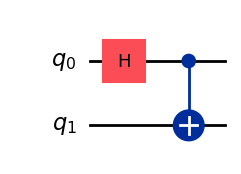

In [17]:
# based on  https://docs.quantum.ibm.com/guides/hello-world
# 
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
#from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

job id: d0h863gfbx30008w8ys0
PrimitiveResult([{'__type__': 'SamplerPubResult', '__value__': {'data': DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=5>)), 'metadata': {'circuit_metadata': {}}}}], metadata={'execution': {'execution_spans': {'__type__': 'ExecutionSpanCollection', '__value__': {'spans': [{'__type__': 'DoubleSliceSpan', '__value__': {'start': datetime.datetime(2025, 5, 12, 23, 25, 4, 166133), 'stop': datetime.datetime(2025, 5, 12, 23, 25, 7, 456156), 'data_slices': {'0': [[4096], 0, 1, 0, 4096]}}}]}}}, 'version': 2})


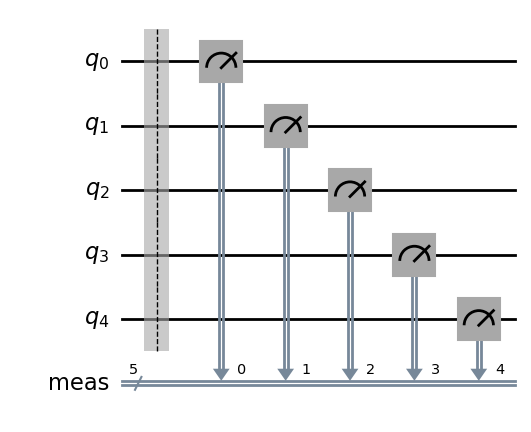

In [18]:



from qiskit.circuit import QuantumCircuit

from qiskit_ibm_runtime import QiskitRuntimeService

#from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator, SamplerV2 as Sampler

# Create empty circuit
example_circuit = QuantumCircuit(5)
example_circuit.measure_all()
 
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
 
sampler = Sampler(backend)
job = sampler.run([example_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

example_circuit.draw("mpl") 


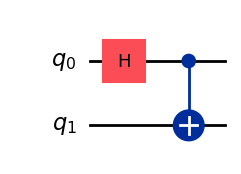

In [25]:
# alternative hello world test:

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
#from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [26]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [32]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager

service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
#pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
pm = generate_preset_pass_manager(backend=backend)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

ImportError: cannot import name 'generate_preset_pass_manager' from 'qiskit.transpiler' (C:\Users\Ted Hromadka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit\transpiler\__init__.py)

In [ ]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

In [20]:
# https://quantumcomputing.stackexchange.com/questions/39185/generate-preset-pass-manager-and-sampler-api-usage-in-ibm-qiskit

# Optimize problem for quantum execution
service = QiskitRuntimeService(channel = 'ibm_quantum', instance="ibm-q/open/main")
#backend = service.least_busy(operational=True, simulator=False)
backend = service.least_busy(simulator=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

sampler = Sampler(mode=backend)
sampler.options.default_shots = 100000
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

QiskitBackendNotFoundError: 'No backend matches the criteria.'

In [21]:
from qiskit.quantum_info import SparsePauliOp 

# Set up six different observables.
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [22]:
# Use the following code instead if you want to run on a simulator:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()
estimator = Estimator(backend)
 
# Convert to an ISA circuit and layout-mapped observables.
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]

ImportError: cannot import name 'generate_preset_pass_manager' from 'qiskit.transpiler' (C:\Users\Ted Hromadka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit\transpiler\__init__.py)

In [36]:
# https://docs.quantum.ibm.com/api/qiskit/transpiler

# the following code is meant to test the preset-pass-manager

from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Any abstract circuit you want:
abstract = QuantumCircuit(2)
abstract.h(0)
abstract.cx(0, 1)

service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

# Any method you like to retrieve the backend you want to run on:
#backend = QiskitRuntimeService().backend("some-backend")
 
# Create the pass manager for the transpilation ...
pm = generate_preset_pass_manager(backend=backend)
# ... and use it (as many times as you like).
physical = pm.run(abstract)

ImportError: cannot import name 'generate_preset_pass_manager' from 'qiskit.transpiler' (C:\Users\Ted Hromadka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit\transpiler\__init__.py)

In [39]:
# https://quantumcomputing.stackexchange.com/questions/39185/generate-preset-pass-manager-and-sampler-api-usage-in-ibm-qiskit

from qiskit import QuantumCircuit, transpile, assemble
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# https://github.com/Qiskit/qiskit-ibm-runtime
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Save an IBM Cloud account.
#QiskitRuntimeService.save_account(channel="ibm_quantum", token="Add_your_key", overwrite=True)


# Read default credentials from disk
service = QiskitRuntimeService(channel = 'ibm_quantum')

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
print(qc.draw())

# Optimize problem for quantum execution
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

sampler = Sampler(mode=backend)
sampler.options.default_shots = 100000
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'